In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [7]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

#### 281 Plus services    |    266 Basic-Services    |    236 Total services    |    217 E-Service Customers

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

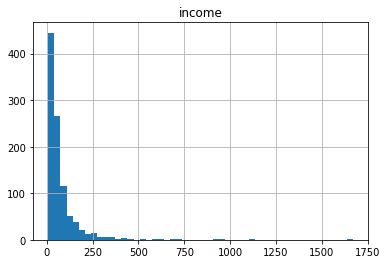

In [12]:
df.hist(column = "income", bins = 50)
df.columns

In [16]:
y = df['custcat'].values
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values
X[:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [18]:
ss = StandardScaler()
X = ss.fit_transform(X.astype(float))
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)
print('Train set:', x_train.shape,  y_train.shape)
print('Test set:', x_test.shape,  y_test.shape)

Train set: (750, 11) (750,)
Test set: (250, 11) (250,)


In [25]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
Knn = KNeighborsClassifier(n_neighbors = k)
Knn.fit(x_train, y_train)
Knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [27]:
yhat = Knn.predict(x_test)
yhat

array([1, 1, 3, 2, 4, 3, 3, 2, 2, 4, 1, 4, 3, 1, 3, 1, 4, 4, 3, 4, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 4, 1, 1, 4, 4, 3, 2, 3, 1, 2, 3, 3, 4, 2, 1,
       4, 1, 4, 1, 4, 4, 2, 1, 2, 3, 2, 3, 3, 3, 1, 1, 1, 4, 2, 3, 2, 1,
       1, 2, 2, 1, 1, 3, 4, 3, 2, 1, 4, 2, 2, 3, 3, 1, 2, 4, 4, 2, 3, 4,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 4, 1, 2, 4, 1, 1, 1, 4, 2, 2, 2, 2,
       1, 3, 2, 4, 1, 2, 1, 1, 2, 3, 4, 2, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 4, 2, 2, 2, 1, 1, 3, 1, 1, 4, 1, 1, 2, 1, 3, 2, 2, 1, 2, 2, 3,
       2, 3, 3, 3, 3, 2, 2, 1, 1, 1, 3, 4, 4, 1, 3, 1, 3, 1, 1, 2, 2, 2,
       1, 4, 1, 1, 1, 2, 1, 3, 3, 1, 2, 1, 4, 4, 3, 1, 1, 3, 3, 1, 1, 3,
       3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 1, 2, 1, 3, 2, 1, 3, 3, 1, 2, 1, 1,
       4, 3, 2, 2, 4, 2, 1, 4, 4, 1, 4, 3, 1, 2, 2, 2, 1, 2, 4, 1, 3, 4,
       4, 4, 3, 3, 4, 1, 2, 2], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score

print("Train set Accuracy: ", accuracy_score(y_train, Knn.predict(x_train)))
print("Test set Accuracy: ", accuracy_score(y_test, Knn.predict(x_test)))

Train set Accuracy:  0.5413333333333333
Test set Accuracy:  0.332


In [37]:
k = 6
Knn2 = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
print("Train set Accuracy: ", accuracy_score(y_train, Knn2.predict(x_train)))
print("Test set Accuracy: ", accuracy_score(y_test, Knn2.predict(x_test)))

Train set Accuracy:  0.5173333333333333
Test set Accuracy:  0.316


In [47]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks): 
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.296, 0.3  , 0.304, 0.332, 0.34 , 0.316, 0.356, 0.332, 0.356])

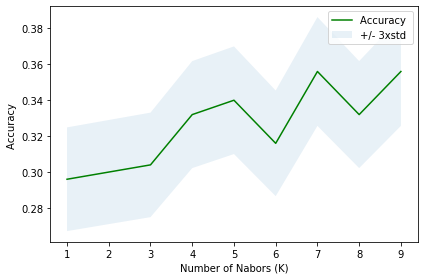

In [42]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [51]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.356 with k= 7
